In [1]:
import numpy as np 
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import csv
import math
from matplotlib.patches import Rectangle

In [2]:
path="/media/files/workplaces/cym/midata/Seafile/星座数据/"

In [3]:
constellations=["starlink","kuiper","oneweb","iridium"]
policy="P_OPT"

In [4]:
# gs_type = "single"
label = "distributed"
single_upbound=[2000,10000,20000,30000]
result={}
name_s=['SpaceCore','NTN','SkyCore','DPCM','Tiansuan']
constellation="starlink"
path="/media/files/workplaces/cym/midata/Seafile/星座数据/"
if constellation=="starlink":
    path+="starlink_72_22/oneweek_interval60/"
elif constellation=="kuiper":
    path+="kuiper/"
elif constellation=="oneweb":
    path+="OneWeb-1week/"
elif constellation=="iridium":
    path+="Iridium_1week/"

In [5]:
#RTT数据
constellations=["starlink","kuiper","oneweb","iridium"]
pdu={}
mobility={}
for constellation in constellations:
    path="/media/files/workplaces/cym/midata/Seafile/星座数据/"
    if constellation=="starlink":
        path+="starlink_72_22/oneweek_interval60/"
    elif constellation=="kuiper":
        path+="kuiper/"
    elif constellation=="oneweb":
        path+="OneWeb-1week/"
    elif constellation=="iridium":
        path+="Iridium_1week/"
    pdu[constellation]=[]
    mobility[constellation]=[]
    for s_index in range(len(name_s)):
        r_flag="pdu"
        pdu[constellation].append(np.array(np.load(path+"opt_handover/rtt/"+label+"_solution_"+name_s[s_index]+"_"+r_flag+"_rtt.npy",allow_pickle=True)))#99,10000
        r_flag="other"
        tmp2=np.array(np.load(path+"opt_handover/rtt/"+label+"_solution_"+name_s[s_index]+"_"+r_flag+"_rtt.npy",allow_pickle=True))
        mo=[]
        for mins in tmp2:
            user_mo=[]
            for user in mins:
                user_mo.append(np.sum(user))
            mo.append(user_mo)
        mobility[constellation].append(mo)
    print(np.shape(pdu[constellation]))
    print(np.shape(mobility[constellation]))

(5, 99, 10000)
(5, 99)


/home/ailab/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(5, 99, 10000)
(5, 99)


/home/ailab/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(5, 99, 10000)
(5, 99)


/home/ailab/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(5, 99, 10000)
(5, 99)


/home/ailab/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [6]:
def zero_out_mean(data):
    tmp=[]
    for item in data:
        if item !=0:
            tmp.append(item)
    if tmp:
        return np.mean(tmp)  
    else:
        return 0
def zero_out_min(data):
    tmp=[]
    for item in data:
        if item!=0:
            tmp.append(item)
    if tmp:
        return np.min(tmp)
    else:
        return float('inf')
def zero_out_max(data):
    tmp=[]
    for item in data:
        if item!=0:
            tmp.append(item)
    if tmp:
        return np.max(tmp)
    else:
        return 0

In [7]:
#数据处理
#byte
result_mobility_byte={}
result_mobility_num={}
result_session_byte={}
result_session_num={}
for constellation in constellations:
    print(constellation)
    path="/media/files/workplaces/cym/midata/Seafile/星座数据/"
    if constellation=="starlink":
        path+="starlink_72_22/oneweek_interval60/"
    elif constellation=="kuiper":
        path+="kuiper/"
    elif constellation=="oneweb":
        path+="OneWeb-1week/"
    elif constellation=="iridium":
        path+="Iridium_1week/"
    result1={}
    result2={}
    for num in single_upbound:
        tmp_mobility=[]
        tmp_pdu_session=[]
        for i in range(len(name_s)):
            s_index=i
            tmp_mobility.append(np.array(np.load(path+"opt_handover/satellite/"+label+"_solution_"+name_s[s_index]+"_state_"+str(num)+"_mobility.npy")))
            tmp_pdu_session.append(np.array(np.load(path+"opt_handover/satellite/"+label+"_solution_"+name_s[s_index]+"_state_"+str(num)+"_session.npy")))
        result1[num]=tmp_mobility
        result2[num]=tmp_pdu_session
    constellations_mobility_byte={}
    constellations_mobility_num={}
    constellations_session_byte={}
    constellations_session_num={}
    for num in single_upbound:
        tmp1=result1[num]
        tmp2=result2[num]
        print(np.shape(tmp1))
        #byte和num 分离
        scenario_mobility_byte=[]
        scenario_mobility_num=[]
        scenario_session_byte=[]
        scenario_session_num=[]
        for scenario in tmp1:
            tmp_byte=[]
            tmp_num=[]
            for mins in scenario:
                byte_min=[x[0]for x in mins]
                num_min=[x[1] for x in mins]
                tmp_byte.append(byte_min)
                tmp_num.append(num_min)
            per_sat_byte=[[r[col]/60 for r in tmp_byte] for col in range(len(tmp_byte[0]))] ###*8单位已经变成bit了
            per_sat_num=[[r[col]/60 for r in tmp_num] for col in range(len(tmp_num[0]))]
            t_byte=[np.mean(sat) for sat in per_sat_byte]
            t_num=[np.mean(sat) for sat in per_sat_num]
            scenario_mobility_byte.append(t_byte)
            scenario_mobility_num.append(t_num)
        constellations_mobility_byte[num]=scenario_mobility_byte
        constellations_mobility_num[num]=scenario_mobility_num
        for scenario in tmp2:
            tmp_byte=[]
            tmp_num=[]
            for mins in scenario:
                byte_min=[x[0]for x in mins]
                num_min=[x[1] for x in mins]
                tmp_byte.append(byte_min)
                tmp_num.append(num_min)
            per_sat_byte=[[r[col]/60 for r in tmp_byte] for col in range(len(tmp_byte[0]))]
            per_sat_num=[[r[col]/60 for r in tmp_num] for col in range(len(tmp_num[0]))]
            t_byte=[zero_out_mean(sat) for sat in per_sat_byte]
            t_num=[zero_out_mean(sat) for sat in per_sat_num]
            scenario_session_byte.append(t_byte)
            scenario_session_num.append(t_num)
        constellations_session_byte[num]=scenario_session_byte
        constellations_session_num[num]=scenario_session_num
    result_mobility_byte[constellation]=constellations_mobility_byte
    result_mobility_num[constellation]=constellations_mobility_num
    result_session_byte[constellation]=constellations_session_byte
    result_session_num[constellation]=constellations_session_num
    print(np.shape(constellations_session_num[10000]))

starlink
(5, 99, 1584, 2)
(5, 99, 1584, 2)
(5, 99, 1584, 2)
(5, 99, 1584, 2)
(5, 1584)
kuiper
(5, 99, 1156, 2)
(5, 99, 1156, 2)
(5, 99, 1156, 2)
(5, 99, 1156, 2)
(5, 1156)
oneweb
(5, 99, 720, 2)
(5, 99, 720, 2)
(5, 99, 720, 2)
(5, 99, 720, 2)
(5, 720)
iridium
(5, 99, 66, 2)
(5, 99, 66, 2)
(5, 99, 66, 2)
(5, 99, 66, 2)
(5, 66)


In [8]:
sat_all={}
for constellation in constellations:
    tmp_sat={}
    for num in single_upbound:
        tt_sat=[]
        for s in range(len(result_mobility_byte[constellation][num])):
            tt_sat.append([result_mobility_byte[constellation][num][s][i] + result_session_byte[constellation][num][s][i]for i in range(len(result_mobility_byte[constellation][num][s]))])
        print(np.shape(tt_sat))
        tmp_sat[num]=tt_sat
    sat_all[constellation]=tmp_sat

(5, 1584)
(5, 1584)
(5, 1584)
(5, 1584)
(5, 1156)
(5, 1156)
(5, 1156)
(5, 1156)
(5, 720)
(5, 720)
(5, 720)
(5, 720)
(5, 66)
(5, 66)
(5, 66)
(5, 66)


In [9]:
#UE与gs的配对关系
distributed_file="../data/pairs.npy"
pair=np.array(np.load(distributed_file,allow_pickle=True))
print(np.shape(pair))

(10000,)


In [10]:
cycle=100
def cal_handover():
    r=[]
    for t in range(1,cycle):
        r_in=[]
        for i in range(len(ue_access)):
            if ue_access[i][t-1] != ue_access[i][t]:
                r_in.append(i)
        r.append(r_in)
    return r
handover_result={}
for constellation in constellations:
    path="/media/files/workplaces/cym/midata/Seafile/星座数据/"
    if constellation=="starlink":
        path+="starlink_72_22/oneweek_interval60/"
    elif constellation=="kuiper":
        path+="kuiper/"
    elif constellation=="oneweb":
        path+="OneWeb-1week/"
    elif constellation=="iridium":
        path+="Iridium_1week/"
    ue_access_file=path+constellation+"_ue_access_"+policy+".npy"
    ue_access=np.array(np.load(ue_access_file,allow_pickle=True))
    ho=cal_handover()
    print(np.shape(ho))
    handover_result[constellation]=ho

/home/ailab/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(99,)


/home/ailab/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(99,)


/home/ailab/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(99,)
(99,)


/home/ailab/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [11]:
#mobility
pdu_gsl=[[0,0],[3,40],[0,0],[0,0],[0,0]]
mobility_gsl=[[[0,0],[2,17],[0,0],[5,7],[5,7]],[[0,0],[1,0],[0,0],[1,1],[1,1]]]
gsl_mobility_byte={}
gsl_mobility_num={}
for constellation in constellations:
    path="/media/files/workplaces/cym/midata/Seafile/星座数据/"
    if constellation=="starlink":
        path+="starlink_72_22/oneweek_interval60/"
    elif constellation=="kuiper":
        path+="kuiper/"
    elif constellation=="oneweb":
        path+="OneWeb-1week/"
    elif constellation=="iridium":
        path+="Iridium_1week/"
    ue_access_file=path+constellation+"_ue_access_"+policy+".npy"
    ue_access=np.array(np.load(ue_access_file,allow_pickle=True))
    bound_byte=[]
    bound_num=[]
    for b_index in range(len(single_upbound)):    
        ratio_file="../data/"+constellation+"_per_user_ratio"+str(single_upbound[b_index])+".npy"
        ratio=np.array(np.load(ratio_file,allow_pickle=True))
        s_byte=[]
        s_num=[]
        for s_index in range(len(name_s)):
            time_byte=[]
            time_num=[]
            for c in range(len(handover_result[constellation])):
                gs_byte=[0.0]*39
                gs_num=[0.0]*39
                for user in handover_result[constellation][c]:
                    cur_sat=ue_access[user][c]-1
                    cur_gs=pair[user]
                    r=ratio[c][cur_sat]
                    gs_byte[cur_gs]+=(r*(mobility_gsl[0][s_index][0]+mobility_gsl[1][s_index][0]))
                    gs_num[cur_gs]+=(r*(mobility_gsl[0][s_index][1]+mobility_gsl[1][s_index][1]))
                '''
                if c%2==0:
                    for user in range(len(ue_access)):
                        cur_sat=ue_access[user][c]-1
                        cur_gs=pair[user]
                        r=ratio[c+1][cur_sat]
                        gs_byte[cur_gs]+=(r*pdu_gsl[s_index][0])
                        gs_num[cur_gs]+=(r*pdu_gsl[s_index][1])
                '''
                time_byte.append(gs_byte)
                time_num.append(gs_num)
            s_byte.append(time_byte)
            s_num.append(time_num)
        bound_byte.append(s_byte)
        bound_num.append(s_num)
    print(np.shape(bound_byte))
    gsl_mobility_byte[constellation]=bound_byte
    gsl_mobility_num[constellation]=bound_num
    

(4, 5, 99, 39)
(4, 5, 99, 39)
(4, 5, 99, 39)
(4, 5, 99, 39)


In [12]:
#pdu
pdu_gsl=[[0,0],[3,40],[0,0],[0,0],[0,0]]
mobility_gsl=[[[0,0],[2,17],[0,0],[5,7],[5,7]],[[0,0],[1,0],[0,0],[1,1],[1,1]]]
gsl_session_byte={}
gsl_session_num={}
for constellation in constellations:
    path="/media/files/workplaces/cym/midata/Seafile/星座数据/"
    if constellation=="starlink":
        path+="starlink_72_22/oneweek_interval60/"
    elif constellation=="kuiper":
        path+="kuiper/"
    elif constellation=="oneweb":
        path+="OneWeb-1week/"
    elif constellation=="iridium":
        path+="Iridium_1week/"
    ue_access_file=path+constellation+"_ue_access_"+policy+".npy"
    ue_access=np.array(np.load(ue_access_file,allow_pickle=True))
    bound_byte=[]
    bound_num=[]
    for b_index in range(len(single_upbound)):    
        ratio_file="../data/"+constellation+"_per_user_ratio"+str(single_upbound[b_index])+".npy"
        ratio=np.array(np.load(ratio_file,allow_pickle=True))
        s_byte=[]
        s_num=[]
        for s_index in range(len(name_s)):
            time_byte=[]
            time_num=[]
            for c in range(len(handover_result[constellation])):
                gs_byte=[0.0]*39
                gs_num=[0.0]*39
                if c%2==0:
                    for user in range(len(ue_access)):
                        cur_sat=ue_access[user][c]-1
                        cur_gs=pair[user]
                        r=ratio[c+1][cur_sat]
                        gs_byte[cur_gs]+=(r*pdu_gsl[s_index][0])
                        gs_num[cur_gs]+=(r*pdu_gsl[s_index][1])
                time_byte.append(gs_byte)
                time_num.append(gs_num)
            s_byte.append(time_byte)
            s_num.append(time_num)
        bound_byte.append(s_byte)
        bound_num.append(s_num)
    print(np.shape(bound_byte))
    gsl_session_byte[constellation]=bound_byte
    gsl_session_num[constellation]=bound_num
    

(4, 5, 99, 39)
(4, 5, 99, 39)
(4, 5, 99, 39)
(4, 5, 99, 39)


starlink
Session Satellite:[0, 15584.864663241991, 0, 0, 0]
Mobility satellite: [158.19557262439207, 3743.022222859912, 2769.0241487900894, 6377.842901872258, 7801.603055491787]
Session ground station:[0, 32147.7995, 0, 0, 0]
Mobility ground station:[0, 9963.5316983911, 0, 19927.0633967822, 19927.0633967822]
kuiper
Session Satellite:[0, 11076.746614623491, 0, 0, 0]
Mobility satellite: [164.61419544347743, 3358.516025450584, 3184.6068288129277, 5566.489501124276, 7048.017260115574]
Session ground station:[0, 25648.83625, 0, 0, 0]
Mobility ground station:[0, 8595.98735083904, 0, 17191.97470167808, 17191.97470167808]
oneweb
Session Satellite:[0, 5808.5207501855475, 0, 0, 0]
Mobility satellite: [153.44555462027685, 1835.2086405723906, 3077.6701346801347, 2582.5708922558924, 3963.5808838383837]
Session ground station:[0, 15799.853875, 0, 0, 0]
Mobility ground station:[0, 5239.107615497171, 0, 10478.215230994341, 10478.215230994341]
iridium
Session Satellite:[0, 2888.3799013374087, 0, 0, 0]


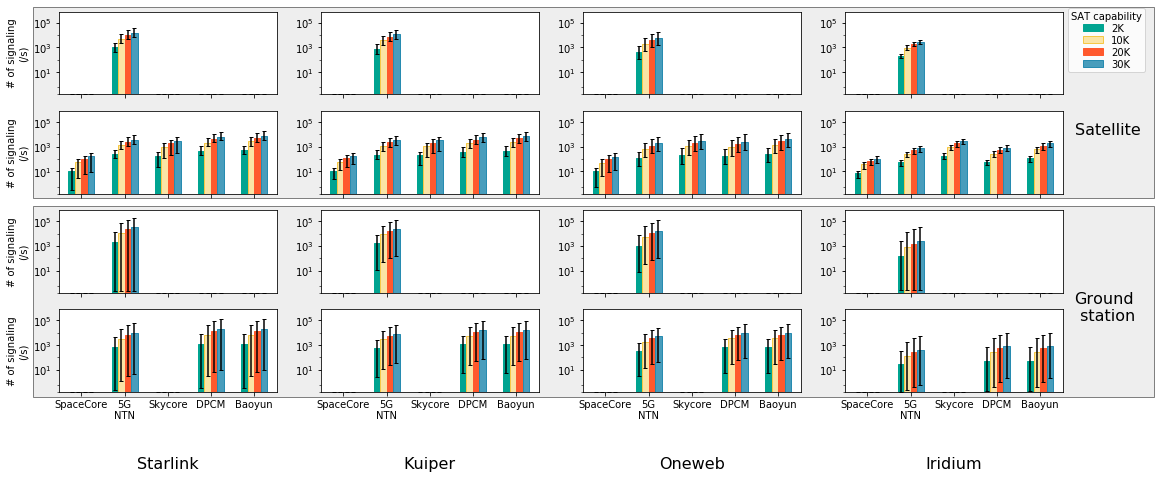

In [59]:
#画图
#byte=num of signaling 
#num=num of states
color=["#00A491","#FAE4A5","#FF592D","#489DBC"]
edgecolor=["#00A491","#F6C845","#FF592D","#278BB0"]
user_label=["2K","10K","20K","30K"]
title=["Starlink","Kuiper","Oneweb","Iridium"]
width=1.5
offset=[-3*width/2,-width/2,width/2,3*width/2]
location=[10,20,30,40,50]
fig, _ = plt.subplots(4,4,sharex=True,figsize=(18,7))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
for c in range(len(constellations)):
    constellation=constellations[c]
    print(constellation)
    constellations_session=result_session_byte[constellation]
    constellations_mobility=result_mobility_byte[constellation]
    session_sat_mean={}
    session_sat_y={}
    mobility_sat_mean={}
    mobility_sat_y={}
    for num in single_upbound:
        session_sat_mean[num]=[zero_out_mean(scenario) for scenario in constellations_session[num]]
        session_max=[zero_out_max(scenario) for scenario in constellations_session[num]]
        session_min=[zero_out_min(scenario) for scenario in constellations_session[num]]
        session_sat_y[num]=[]
        y1=[]
        y2=[]
        for i in range(len(constellations_session[num])):
            y1.append(session_sat_mean[num][i]-session_min[i])
            y2.append(session_max[i]-session_sat_mean[num][i])
        session_sat_y[num].append(y1)
        session_sat_y[num].append(y2)
        mobility_sat_mean[num]=[zero_out_mean(scenario) for scenario in constellations_mobility[num]]
        mobility_max=[zero_out_max(scenario) for scenario in constellations_mobility[num]]
        mobility_min=[zero_out_min(scenario) for scenario in constellations_mobility[num]]
        mobility_sat_y[num]=[]
        y1=[]
        y2=[]
        for i in range(len(constellations_session[num])): 
            y1.append(mobility_sat_mean[num][i]-mobility_min[i])
            y2.append(mobility_max[i]-mobility_sat_mean[num][i])
        mobility_sat_y[num].append(y1)
        mobility_sat_y[num].append(y2)
    all_signal_mean={}
    all_signal_y={}
    for num in single_upbound:
        all_signal_mean[num]=[zero_out_mean(ss) for ss in sat_all[constellation][num] ]
        tmp_max=[zero_out_max(ss) for ss in sat_all[constellation][num] ]
        tmp_min=[zero_out_min(ss) for ss in sat_all[constellation][num]]
        all_signal_y[num]=[]
        y1=[]
        y2=[]
        for s in range(len(tmp_max)):
            y1.append(all_signal_mean[num][s]-tmp_min[s])
            y2.append(tmp_max[s]-all_signal_mean[num][s])
        all_signal_y[num].append(y1)
        all_signal_y[num].append(y2)
    
   
    
    session_gs_mean={}
    session_gs_y={}
    mobility_gs_mean={}
    mobility_gs_y={}
    signal_gs_mean={}
    signal_gs_y={}
    for b_index in range(len(single_upbound)):
        num=single_upbound[b_index]
        session_gs_mean[num]=[]
        byte_max=[]
        byte_min=[]
        mobility_gs_mean[num]=[]
        num_max=[]
        num_min=[]
        signal_gs_mean[num]=[]
        all_max=[]
        all_min=[]
        for s_index in range(len(name_s)):
            gs_byte_tmp=[]
            gs_num_tmp=[]
            gs_all_tmp=[]
            for gs_index in range(39):
                gs_byte_tmp.append([mins[gs_index]/60 for mins in gsl_session_byte[constellation][b_index][s_index]])
                gs_num_tmp.append([mins[gs_index]/60 for mins in gsl_mobility_byte[constellation][b_index][s_index]])
                gs_all_tmp.append([(gsl_session_byte[constellation][b_index][s_index][i][gs_index]+gsl_mobility_byte[constellation][b_index][s_index][i][gs_index])/60 for i in range(len(gsl_session_byte[constellation][b_index][s_index]))])
            session_gs_mean[num].append(zero_out_mean([zero_out_mean(gs) for gs in gs_byte_tmp]))
            mobility_gs_mean[num].append(zero_out_mean([zero_out_mean(gs) for gs in gs_num_tmp]))
            signal_gs_mean[num].append(zero_out_mean([zero_out_mean(gs) for gs in gs_all_tmp]))
            byte_max.append(zero_out_max([zero_out_max(gs) for gs in gs_byte_tmp]))
            byte_min.append(zero_out_min([zero_out_min(gs) for gs in gs_byte_tmp]))
            num_max.append(zero_out_max([zero_out_max(gs) for gs in gs_num_tmp]))
            num_min.append(zero_out_min([zero_out_min(gs) for gs in gs_num_tmp]))
            all_max.append(zero_out_max([zero_out_max(gs) for gs in gs_all_tmp]))
            all_min.append(zero_out_min([zero_out_min(gs) for gs in gs_all_tmp]))
        session_gs_y[num]=[]
        mobility_gs_y[num]=[]
        signal_gs_y[num]=[]                          
        y1=[]
        y2=[]
        y3=[]
        y4=[]
        y5=[]
        y6=[]
        for i in range(len(session_gs_mean[num])):
            y1.append(session_gs_mean[num][i]-byte_min[i])
            y2.append(byte_max[i]-session_gs_mean[num][i])
            y3.append(mobility_gs_mean[num][i]-num_min[i])
            y4.append(num_max[i]-mobility_gs_mean[num][i])
            y5.append(signal_gs_mean[num][i]-all_min[i])
            y6.append(all_max[i]-signal_gs_mean[num][i])
            
        session_gs_y[num].append(y1)
        session_gs_y[num].append(y2)
        mobility_gs_y[num].append(y3)
        mobility_gs_y[num].append(y4)
        signal_gs_y[num].append(y5)
        signal_gs_y[num].append(y6)
        
    plt.subplot(4,4,c+1)
    print("Session Satellite:"+str(session_sat_mean[30000]))
    plt.yscale("symlog")
    f3=[]
    for i in range(len(single_upbound)):
        f3.append(plt.bar([n+offset[i] for n in location],session_sat_mean[single_upbound[i]],yerr=session_sat_y[single_upbound[i]],color=color[i],edgecolor=edgecolor[i],width=width,capsize=2))
    plt.ylim([0,8e5])
    plt.yticks([1e1,1e3,1e5],['$ \mathit{10}^{1}$','$ \mathit{10}^{3}$','$ \mathit{10}^{5}$'])
    if constellation=="starlink":
        plt.ylabel("# of signaling\n(/s)")
    plt.xticks(location,["","","",""])
    if c==3:
        plt.legend(f3,["2K","10K","20K","30K"],title="SAT capability",loc="upper left", bbox_to_anchor=(1, 1.1),ncol=1,labelspacing=0.2,borderpad=0.3)#prop={'size': 8}
# legend and label
    

    plt.subplot(4,4,c+5)
    print("Mobility satellite: "+str(mobility_sat_mean[30000]))
    plt.yscale("symlog")
    for i in range(len(single_upbound)):
#         print(constellation+str(num_mean2[single_upbound[i]]))
        plt.bar([n+offset[i] for n in location],mobility_sat_mean[single_upbound[i]],yerr=mobility_sat_y[single_upbound[i]],color=color[i],edgecolor=edgecolor[i],width=width,capsize=2,label=user_label[i])
    plt.ylim([0,8e5])
    plt.yticks([1e1,1e3,1e5],['$ \mathit{10}^{1}$','$ \mathit{10}^{3}$','$ \mathit{10}^{5}$'])
    if constellation=="starlink":
        plt.ylabel("# of signaling\n(/s)")
    if constellation=="iridium":
        plt.text(58,1e4,"Satellite",fontsize=16)
    plt.xticks(location,["","","",""])
    
    plt.subplot(4,4,c+9)
    print("Session ground station:"+str(session_gs_mean[30000]))
#     print(byte_mean)
    for i in range(len(single_upbound)):
        plt.bar([n+offset[i] for n in location],session_gs_mean[single_upbound[i]],yerr=session_gs_y[single_upbound[i]],color=color[i],edgecolor=edgecolor[i],width=width,capsize=2)
    plt.yscale("symlog")
#     plt.ylim([0,1e6])
#     plt.yticks([1,1e2,1e4,1e6],['$ \mathit{10}^{0}$','$ \mathit{10}^{2}$','$ \mathit{10}^{4}$','$ \mathit{10}^{6}$'])
#     plt.yticks([0,1e1,1e3,1e5,1e7,1e9],['0','$ \mathit{10}^{1}$','$ \mathit{10}^{3}$','$ \mathit{10}^{5}$','$ \mathit{10}^{7}$','$ \mathit{10}^{9}$'])
    if constellation=="starlink":
        plt.ylabel("# of signaling\n(/s)")
    plt.xticks(location,["","","",""])
    plt.ylim([0,8e5])
    plt.yticks([1e1,1e3,1e5],['$ \mathit{10}^{1}$','$ \mathit{10}^{3}$','$ \mathit{10}^{5}$'])
    
    plt.subplot(4,4,c+13)
#     print(num_mean)
    print("Mobility ground station:"+str(mobility_gs_mean[30000]))
    for i in range(len(single_upbound)):
        plt.bar([n+offset[i] for n in location],mobility_gs_mean[single_upbound[i]],yerr=mobility_gs_y[single_upbound[i]],color=color[i],edgecolor=edgecolor[i],width=width,capsize=2)
    plt.yscale("symlog")
    plt.ylim([0,8e5])
    plt.yticks([1e1,1e3,1e5],['$ \mathit{10}^{1}$','$ \mathit{10}^{3}$','$ \mathit{10}^{5}$'])
    if constellation=="starlink":
        plt.ylabel("# of signaling\n(/s)")
    plt.title(title[c],y=-1,fontsize=16)
    plt.xticks(location,["SpaceCore","5G\nNTN","Skycore","DPCM","Baoyun"],fontsize=10)
    if constellation=="iridium":
        plt.text(58,1e5,"Ground\n station",fontsize=16)
        
rect1 = Rectangle((0.105, 0.51), 0.865, 0.38, facecolor='#EEEEEE', edgecolor='grey',
                 transform=fig.transFigure, zorder=0)

fig.patches.append(rect1)

rect1 = Rectangle((0.105, 0.115), 0.865, 0.38, facecolor='#EEEEEE', edgecolor='grey',
                 transform=fig.transFigure, zorder=0)
fig.patches.append(rect1)

plt.savefig("evaluation_session_and_mobility.pdf",bbox_inches='tight')  

starlink
Satellite
30000 [1.0, 122.17716694254533, 17.503803063848423, 40.31619087732208, 49.31619087732208]
kuiper
Satellite
30000 [1.0, 87.69148129166433, 19.34588217154338, 33.8153674179066, 42.81536741790661]
oneweb
Satellite
30000 [1.0, 49.813951337159615, 20.057082411388674, 16.83053574700705, 25.830535747007048]
iridium
Satellite
30000 [1.0, 34.501289429509896, 25.831768634911516, 7.725462699036478, 16.725462699036477]


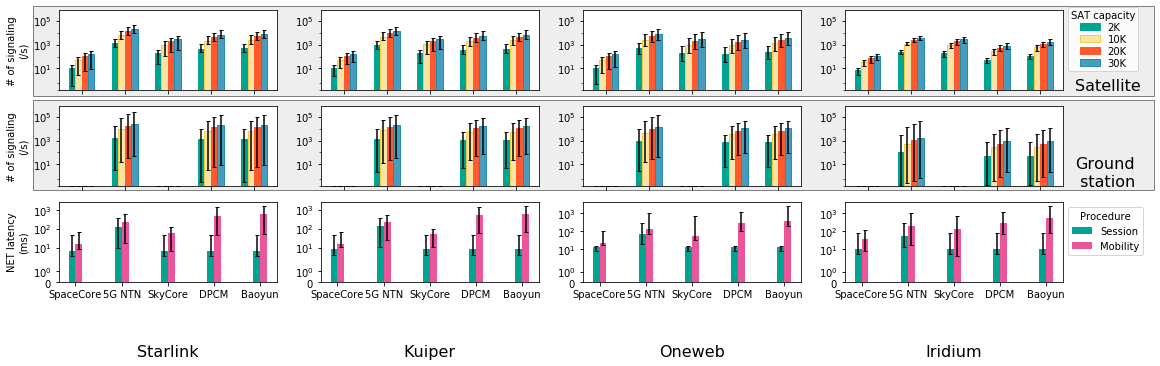

In [65]:

#画图
#byte=num of signaling 
#num=num of states
color=["#00A491","#FAE4A5","#FF592D","#489DBC"]
edgecolor=["#00A491","#F6C845","#FF592D","#278BB0"]
user_label=["2K","10K","20K","30K"]
title=["Starlink","Kuiper","Oneweb","Iridium"]
width=1.5
offset=[-3*width/2,-width/2,width/2,3*width/2]
location=[10,20,30,40,50]
fig, _ = plt.subplots(3,5,sharex=True,figsize=(18,5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
for c in range(len(constellations)):
    constellation=constellations[c]
    print(constellation)
    plt.subplot(3,4,c+9)
    pdu_mean=[]
    mobility_mean=[]
    pdu_y=[]
    mobility_y=[]
    p1=[]
    p2=[]
    m1=[]
    m2=[]
    pdu_box=[]
    for i in range(len(name_s)):
        tmp1=np.mean([zero_out_mean(tt) for tt in pdu[constellation][i]])
        tmp2=np.mean([zero_out_mean(tt) for tt in mobility[constellation][i]])
        pdu_mean.append(tmp1)
        pdu_box.append([zero_out_mean(tt) for tt in pdu[constellation][i]])
        mobility_mean.append(tmp2)
        p1.append(tmp1-np.min([zero_out_min(tt) for tt in pdu[constellation][i]]))
        p2.append(np.max([zero_out_max(tt) for tt in pdu[constellation][i]])-tmp1)
        m1.append(tmp2-np.min([zero_out_min(tt) for tt in mobility[constellation][i]]))
        m2.append(np.max([zero_out_max(tt) for tt in mobility[constellation][i]])-tmp2)
    pdu_y.append(p1)
    pdu_y.append(p2)
    mobility_y.append(m1)
    mobility_y.append(m2)
#     sns.boxplot(data=np.transpose(pdu_box),showfliers=False)
#     print(str(pdu_mean)+" "+str(mobility_mean))
#     print("RTT")
#     print([(pdu_mean[i]+mobility_mean[i])/(pdu_mean[0]+mobility_mean[0])for i in range(5)])
    f1=plt.bar([l-width/2 for l in location],pdu_mean,yerr=pdu_y,color="#00A491",width=width,capsize=2)#,label="Session"
    f2=plt.bar([l+width/2 for l in location],mobility_mean,yerr=mobility_y,color="#EA5699",width=width,capsize=2)#,label="Mobility"
    if constellation=="starlink":
        plt.ylabel("NET latency\n(ms)")    
    plt.yscale("symlog")
    plt.title(title[c],y=-1,fontsize=16)
    if c==3:
        plt.legend([f1,f2],["Session","Mobility"],title="Procedure",loc="upper left", bbox_to_anchor=(1, 1),ncol=1)
    plt.xticks(location,["SpaceCore","5G NTN","SkyCore","DPCM","Baoyun"],fontsize=10)
    

    constellations_byte=result_session_byte[constellation]
    constellations_num=result_mobility_byte[constellation]
    byte_mean={}
    byte_y={}
    num_mean={}
    num_y={}
    for num in single_upbound:
        byte_mean[num]=[zero_out_mean(scenario) for scenario in constellations_byte[num]]
        byte_max=[zero_out_max(scenario) for scenario in constellations_byte[num]]
        byte_min=[zero_out_min(scenario) for scenario in constellations_byte[num]]
        byte_y[num]=[]
        y1=[]
        y2=[]
        for i in range(len(constellations_byte[num])):
            y1.append(byte_mean[num][i]-byte_min[i])
            y2.append(byte_max[i]-byte_mean[num][i])
        byte_y[num].append(y1)
        byte_y[num].append(y2)
        num_mean[num]=[zero_out_mean(scenario) for scenario in constellations_num[num]]
        num_max=[zero_out_max(scenario) for scenario in constellations_num[num]]
        num_min=[zero_out_min(scenario) for scenario in constellations_num[num]]
        num_y[num]=[]
        y1=[]
        y2=[]
        for i in range(len(constellations_byte[num])): 
            y1.append(num_mean[num][i]-num_min[i])
            y2.append(num_max[i]-num_mean[num][i])
        num_y[num].append(y1)
        num_y[num].append(y2)
    all_signal_mean={}
    all_signal_y={}
    for num in single_upbound:
        all_signal_mean[num]=[zero_out_mean(ss) for ss in sat_all[constellation][num] ]
        tmp_max=[zero_out_max(ss) for ss in sat_all[constellation][num] ]
        tmp_min=[zero_out_min(ss) for ss in sat_all[constellation][num]]
        all_signal_y[num]=[]
        y1=[]
        y2=[]
        for s in range(len(tmp_max)):
            y1.append(all_signal_mean[num][s]-tmp_min[s])
            y2.append(tmp_max[s]-all_signal_mean[num][s])
        all_signal_y[num].append(y1)
        all_signal_y[num].append(y2)
    bound_test=30000
    print("Satellite")
    print(str(bound_test)+" "+str([item/all_signal_mean[bound_test][0] for item in all_signal_mean[bound_test]]))
    plt.subplot(3,4,c+1)
    plt.yscale("symlog")
    for i in range(len(single_upbound)):
#         print(str(all_signal_mean[single_upbound[i]][0])+","+str(all_signal_mean[single_upbound[i]][1]))
        plt.bar([n+offset[i] for n in location],all_signal_mean[single_upbound[i]],yerr=all_signal_y[single_upbound[i]],color=color[i],edgecolor=edgecolor[i],width=width,capsize=2)
    plt.xticks(location,["","","",""])  
    if constellation=="starlink":
        plt.ylabel("# of signaling\n(/s)")
    plt.ylim([0,8e5])
    plt.yticks([1e1,1e3,1e5],['$ \mathit{10}^{1}$','$ \mathit{10}^{3}$','$ \mathit{10}^{5}$'])
    if c==3:
        plt.legend(f3,["2K","10K","20K","30K"],title="SAT capacity",loc="upper left", bbox_to_anchor=(1, 1.1),ncol=1,labelspacing=0.2,borderpad=0.3)#prop={'size': 8}
    if constellation=="starlink":
        plt.ylabel("# of signaling\n(/s)")
    if constellation=="iridium":
        plt.text(58,0,"Satellite",fontsize=16)
    
    byte_mean={}
    byte_y={}
    num_mean={}
    num_y={}
    signal_gs_mean={}
    signal_gs_y={}
    for b_index in range(len(single_upbound)):
        num=single_upbound[b_index]
        byte_mean[num]=[]
        byte_max=[]
        byte_min=[]
        num_mean[num]=[]
        num_max=[]
        num_min=[]
        signal_gs_mean[num]=[]
        all_max=[]
        all_min=[]
        for s_index in range(len(name_s)):
            gs_byte_tmp=[]
            gs_num_tmp=[]
            gs_all_tmp=[]
            for gs_index in range(39):
                gs_byte_tmp.append([mins[gs_index]/60 for mins in gsl_session_byte[constellation][b_index][s_index]])
                gs_num_tmp.append([mins[gs_index]/60 for mins in gsl_mobility_byte[constellation][b_index][s_index]])
                gs_all_tmp.append([(gsl_session_byte[constellation][b_index][s_index][i][gs_index]+gsl_mobility_byte[constellation][b_index][s_index][i][gs_index])/60 for i in range(len(gsl_session_byte[constellation][b_index][s_index]))])
            byte_mean[num].append(zero_out_mean([zero_out_mean(gs) for gs in gs_byte_tmp]))
            num_mean[num].append(zero_out_mean([zero_out_mean(gs) for gs in gs_num_tmp]))
            signal_gs_mean[num].append(zero_out_mean([zero_out_mean(gs) for gs in gs_all_tmp]))
            byte_max.append(zero_out_max([zero_out_max(gs) for gs in gs_byte_tmp]))
            byte_min.append(zero_out_min([zero_out_min(gs) for gs in gs_byte_tmp]))
            num_max.append(zero_out_max([zero_out_max(gs) for gs in gs_num_tmp]))
            num_min.append(zero_out_min([zero_out_min(gs) for gs in gs_num_tmp]))
            all_max.append(zero_out_max([zero_out_max(gs) for gs in gs_all_tmp]))
            all_min.append(zero_out_min([zero_out_min(gs) for gs in gs_all_tmp]))
        byte_y[num]=[]
        num_y[num]=[]
        signal_gs_y[num]=[]                          
        y1=[]
        y2=[]
        y3=[]
        y4=[]
        y5=[]
        y6=[]
        for i in range(len(byte_mean[num])):
            y1.append(byte_mean[num][i]-byte_min[i])
            y2.append(byte_max[i]-byte_mean[num][i])
            y3.append(num_mean[num][i]-num_min[i])
            y4.append(num_max[i]-num_mean[num][i])
            y5.append(signal_gs_mean[num][i]-all_min[i])
            y6.append(all_max[i]-signal_gs_mean[num][i])
            
        byte_y[num].append(y1)
        byte_y[num].append(y2)
        num_y[num].append(y3)
        num_y[num].append(y4)
        signal_gs_y[num].append(y5)
        signal_gs_y[num].append(y6)
    plt.subplot(3,4,c+5)
#     print("GS")
#     print("gound stations:"+str([item for item in signal_gs_mean[bound_test]]))
    for i in range(len(single_upbound)):
        plt.bar([n+offset[i] for n in location],signal_gs_mean[single_upbound[i]],yerr=signal_gs_y[single_upbound[i]],color=color[i],edgecolor=edgecolor[i],width=width,capsize=2)
    plt.yscale("symlog")
    if constellation=="starlink":
        plt.ylabel("# of signaling\n(/s)")
    plt.ylim([0,8e5])
    plt.yticks([1e1,1e3,1e5],['$ \mathit{10}^{1}$','$ \mathit{10}^{3}$','$ \mathit{10}^{5}$'])
    plt.xticks(location,["","","",""])
    if constellation=="iridium":
        plt.text(58,0,"Ground\n station",fontsize=16)
        
rect1 = Rectangle((0.105, 0.64), 0.865, 0.25, facecolor='#EEEEEE', edgecolor='grey',
                 transform=fig.transFigure, zorder=0)
fig.patches.append(rect1)
rect2 = Rectangle((0.105, 0.38), 0.865, 0.25,  facecolor="#EEEEEE", edgecolor='grey',
                 transform=fig.transFigure, zorder=0)
fig.patches.append(rect2)

plt.savefig("evaluation_signaling_migration_V2.pdf",bbox_inches='tight')  